### Laboratory 1 — Unsupervised Learning
**Course: MLDM** 

**Performed by:** Corețchi Mihai, IS-251M 

**Verified by:** Rusu Viorel, lect. univ.

Unsupervised learning is a machine learning paradigm in which models are trained on unlabeled data.
The algorithm explores the data to discover hidden structures, patterns, or relationships without predefined outputs. Common tasks include clustering - grouping similar samples, dimensionality reduction, and anomaly detection. It is often used for data exploration, segmentation, and feature extraction.

**Silhouette** score – Measures how well a data point fits within its cluster compared to other clusters. Values range from −1 to 1; higher means better cluster separation.

**Elbow method** – A technique to choose the number of clusters by plotting inertia vs. K and selecting the point where improvement starts to diminish.

In [34]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
random_state = 67

In [37]:
df = pd.read_csv('data/data.csv')

In [38]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [40]:
num_cols = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]

cat_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
X = pd.get_dummies(df[num_cols + cat_cols], drop_first=True)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   CustomerAge                  2512 non-null   int64  
 2   TransactionDuration          2512 non-null   int64  
 3   LoginAttempts                2512 non-null   int64  
 4   AccountBalance               2512 non-null   float64
 5   TransactionType_Debit        2512 non-null   bool   
 6   Location_Atlanta             2512 non-null   bool   
 7   Location_Austin              2512 non-null   bool   
 8   Location_Baltimore           2512 non-null   bool   
 9   Location_Boston              2512 non-null   bool   
 10  Location_Charlotte           2512 non-null   bool   
 11  Location_Chicago             2512 non-null   bool   
 12  Location_Colorado Springs    2512 non-null   bool   
 13  Location_Columbus 

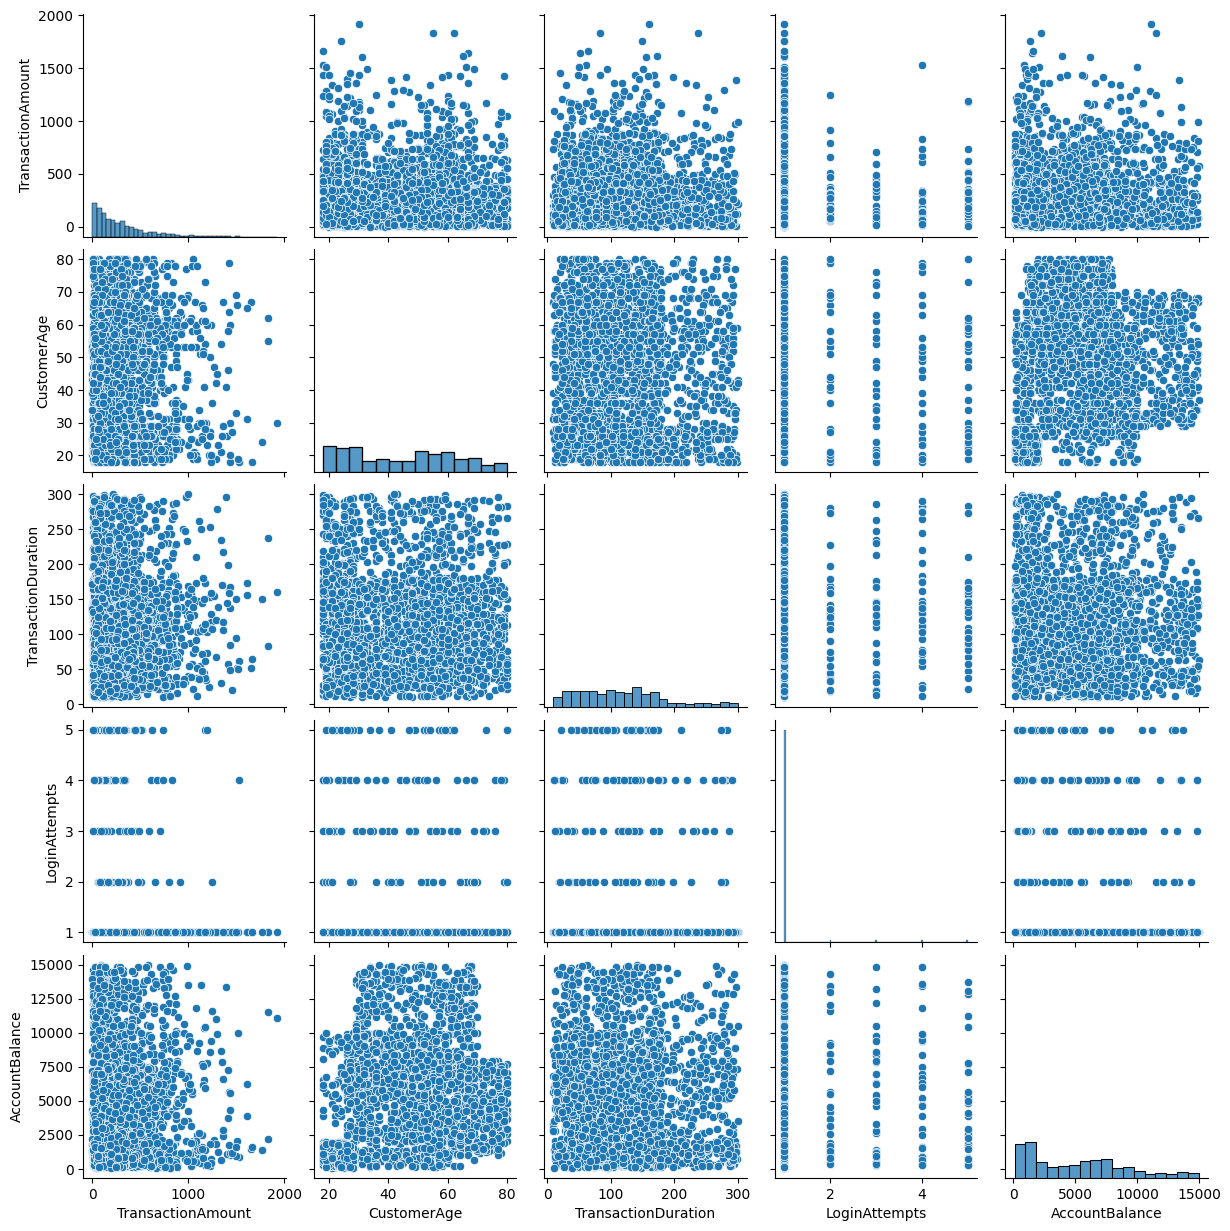

In [41]:
sns.pairplot(df[num_cols + cat_cols])
plt.show()

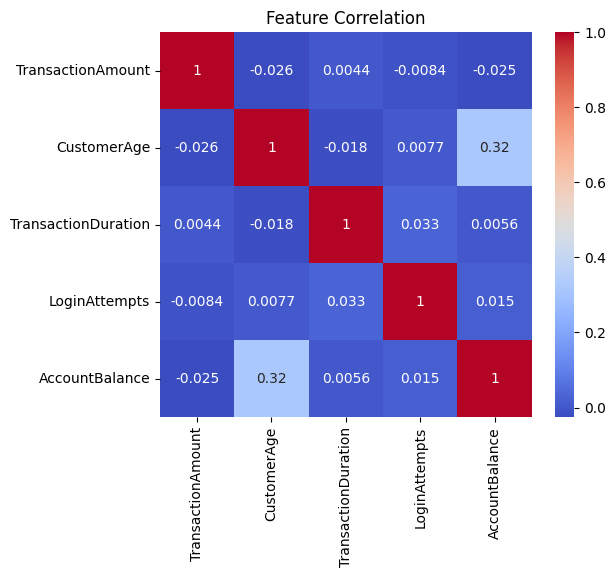

In [42]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


### Partitional clustering
Partitional clustering divides a dataset directly into a fixed number of clusters, producing a single-level partition of the data. Each data point belongs to exactly one cluster, and the goal is to minimize within-cluster dissimilarity while maximizing separation between clusters.

### K-Means
K-Means is the most common partitional algorithm. It initializes K centroids, assigns each point to the nearest centroid, and iteratively updates centroids as the mean of their assigned points. This process continues until assignments stabilize. K-Means is efficient and works well for numeric data with compact, spherical clusters.


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=random_state)
X_2d = pca.fit_transform(X_sc)

#### Elbow Method

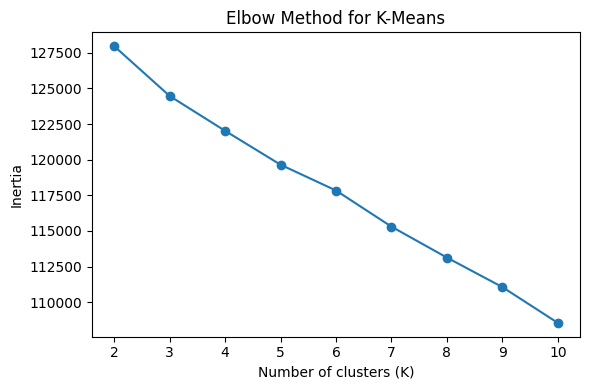

In [45]:
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    km.fit(X_sc)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.tight_layout()
plt.show()

Silhouette score: 0.04258612696053722


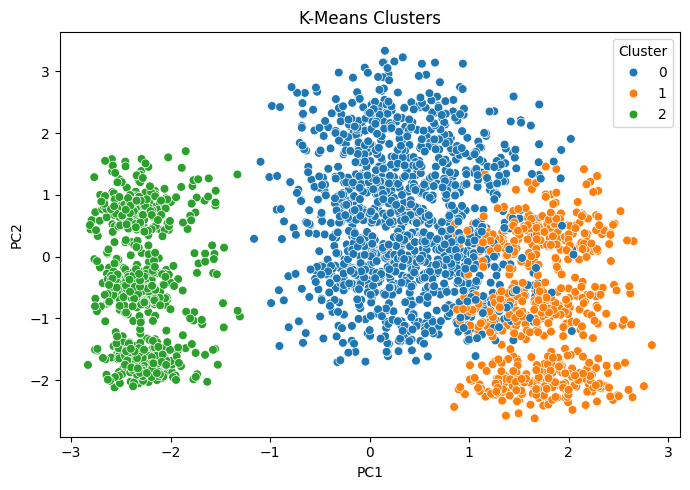

In [46]:
from sklearn.metrics import silhouette_score

k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
labels = kmeans.fit_predict(X_sc)

print("Silhouette score:", silhouette_score(X_sc, labels))


plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=labels, palette="tab10", s=40)
plt.title("K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


The K-Means model with K = 3 forms three visible groups in the PCA space; however, the silhouette score of 0.04 indicates weak cluster separation. This means that, although clusters appear visually distinct in 2D, in the original high-dimensional space the data points are highly overlapping and not well-separated, this suggests that the dataset does not contain strong, compact group structures for K-Means, and the clusters should be interpreted as coarse behavioral segments rather than well-defined groups.


### Hierarchical clustering
Hierarchical clustering builds a hierarchy of clusters instead of producing a single flat partition. The result is a tree-like structure that shows how data points are grouped at different levels of similarity. It does not require choosing the number of clusters in advance—you can cut the hierarchy at any level to obtain the desired number of groups.
#### Agglomerative Clustering
Agglomerative Clustering is the most common hierarchical approach. It starts with each data point as its own cluster and repeatedly merges the two closest clusters until only one remains or a chosen number of clusters is reached. The merging is guided by a distance metric and a linkage criterion, which define how cluster distances are computed.

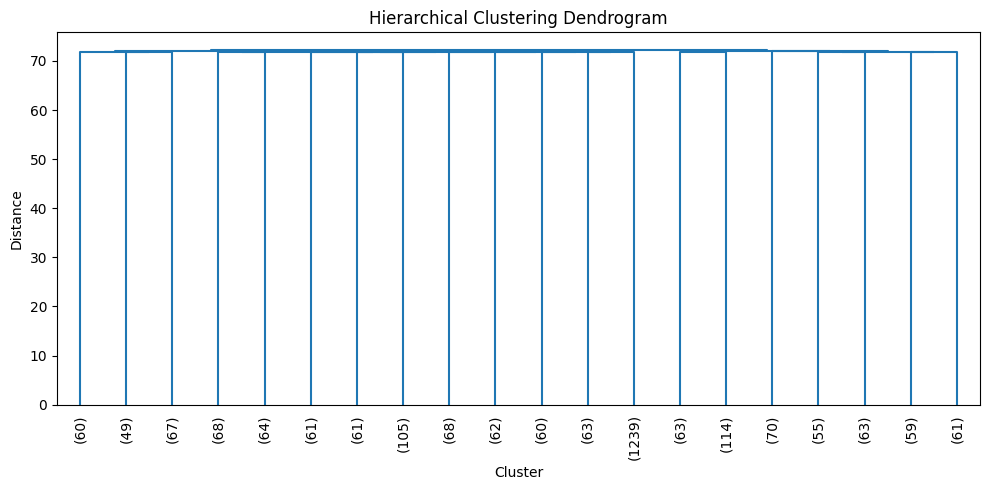

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_sc, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=20,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Silhouette score: 0.03615623038346432


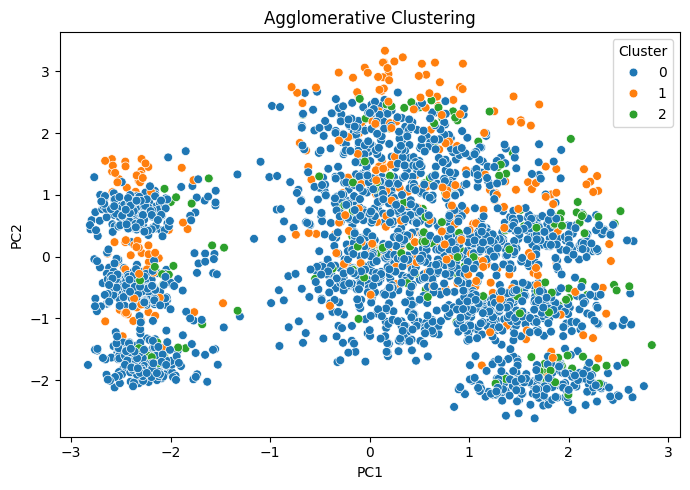

In [48]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
    n_clusters=k,
    linkage="ward"
)
labels = agg.fit_predict(X_sc)

print("Silhouette score:", silhouette_score(X_sc, labels))


plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=labels, palette="tab10", s=40)
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


Agglomerative Clustering with K = 3 produces highly overlapping groups in the PCA space, reflected by the very low silhouette score 0.036. This indicates weak separation between clusters and suggests that the data does not naturally form well-defined hierarchical groups.

While the dendrogram supports a three-cluster structure at a high level, in the original feature space the clusters remain diffuse and intermixed. As a result, the hierarchical method offers limited practical segmentation for this dataset and performs similarly to K-Means in terms of cluster quality.

### Density-based clustering
Density-based clustering groups data based on regions of high point density. Clusters are formed where many points lie close together, while sparse regions are treated as boundaries. This approach can discover clusters of arbitrary shape and naturally identify noise or outliers.
#### Density-Based Spatial Clustering of Applications with Noise
DBSCAN is the most common density-based algorithm. It defines clusters as areas where each point has at least a minimum number of neighbors within a given radius. Points in dense regions become part of a cluster, points on the edges are border points, and isolated points are labeled as noise. DBSCAN does not require specifying the number of clusters in advance and is robust to outliers.

Clusters: 4
Noise points: 2490


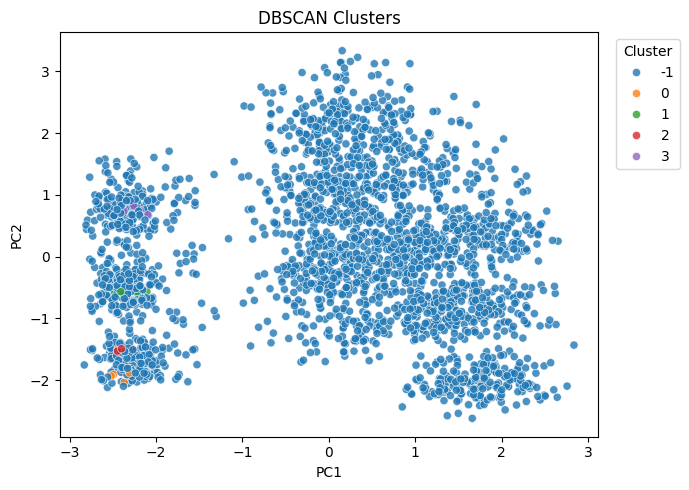

In [49]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=5)  
labels = db.fit_predict(X_sc)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = (labels == -1).sum()
print("Clusters:", n_clusters)
print("Noise points:", n_noise)


plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=labels,
    palette="tab10",
    s=35,
    alpha=0.8
)
plt.title("DBSCAN Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


DBSCAN identifies 4 dense regions and labels a very large portion of the data 2,490 points as noise. This indicates that, in the original feature space, most samples do not form sufficiently dense neighborhoods under the chosen parameters. While DBSCAN successfully detects a few compact groups and highlights outliers, it struggles to segment the dataset meaningfully because the data distribution is diffuse and high-dimensional. In this case, density-based clustering is less suitable than partitional or hierarchical methods for producing coherent customer segments.


### Probabilistic model-based clustering
Probabilistic model-based clustering assumes that the data is generated by a mixture of underlying probability distributions. Each cluster is represented by a statistical model, and the algorithm estimates the parameters that best explain the observed data. Instead of assigning points by distance alone, it assigns them based on likelihood.
#### Gaussian Mixture Model
GMM is the most common probabilistic clustering method. It models the data as a combination of multiple Gaussian distributions, each representing a cluster. Using the Expectation–Maximization algorithm, GMM iteratively estimates the parameters of these distributions and computes the probability that each point belongs to each cluster. Unlike K-Means, GMM produces soft assignments and can model clusters of different shapes and sizes.


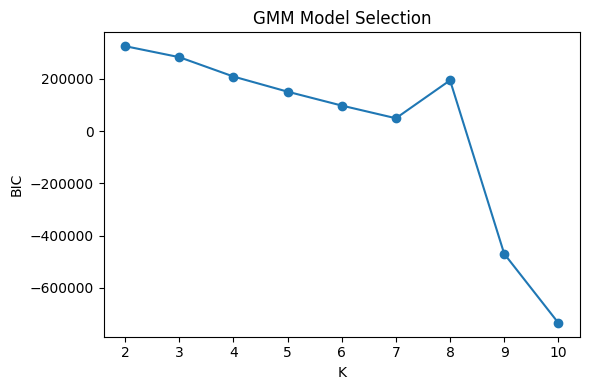

In [58]:
from sklearn.mixture import GaussianMixture

bics = []
K_range = range(2, 11)

for k in K_range:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=random_state)
    gmm.fit(X_sc)
    bics.append(gmm.bic(X_sc))

plt.figure(figsize=(6, 4))
plt.plot(list(K_range), bics, marker="o")
plt.xlabel("K")
plt.ylabel("BIC")
plt.title("GMM Model Selection")
plt.tight_layout()
plt.show()


Silhouette score: 0.05081871699954932


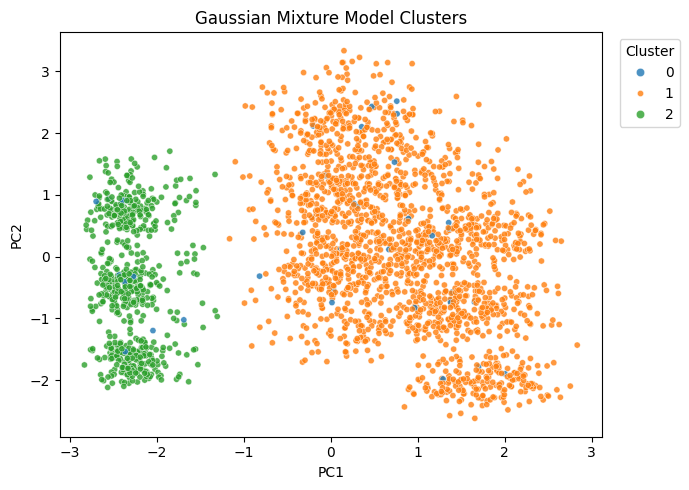

In [59]:

k = 3
gmm = GaussianMixture(
    n_components=k,
    covariance_type="full", 
    random_state=random_state
)
labels = gmm.fit_predict(X_sc)

proba = gmm.predict_proba(X_sc)
max_proba = proba.max(axis=1)

print("Silhouette score:", silhouette_score(X_sc, labels))

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=labels,
    palette="tab10",
    size=max_proba,         
    sizes=(20, 120),
    alpha=0.8
)
plt.title("Gaussian Mixture Model Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

The Gaussian Mixture Model with K = 3 produces soft, probabilistic clusters that partially separate the data, but the silhouette score 0.05 remains low, indicating weak overall structure. While GMM captures different density regions more flexibly than K-Means, the clusters still overlap significantly in the original feature space. This confirms that the dataset does not contain strong natural groupings; GMM reveals a smoother, probabilistic segmentation rather than sharply defined clusters.


### Conclusion

Across all four methods, the results consistently show that the dataset does not exhibit strong natural cluster structure in the original feature space:

* K-Means forms visually separable groups in PCA space, but the very low silhouette score indicates heavy overlap in higher dimensions. The clusters should be interpreted as coarse behavioral segments, not well-defined natural groups.
* Agglomerative Clustering confirms a similar three-cluster structure suggested by the dendrogram, yet produces highly intermixed clusters with a low silhouette score, offering no clear improvement over K-Means.
* DBSCAN identifies a few dense regions but classifies a large portion of the data as noise, showing that the data lacks consistent density patterns required for effective density-based clustering.
* Gaussian Mixture Model provides a softer, probabilistic segmentation and reveals that the data may contain finer latent structure, but even with fewer components the overlap remains significant.

Overall, all methods converge on the same conclusion that the dataset is high-dimensional and diffuse, with weak intrinsic grouping.